In [1]:
# load libs
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy
%matplotlib inline

In [2]:
# global variables
# carla reuse
carla_reuse_raw_data = {
    "task1": {
        "Car_d1": {case: 65.6 for case in ["joint_training", "lwf", "fine_tuning"]},
    },
    "task2": {
        "Car_d1": {
            "joint_training": "65.1+-0.7",
            "lwf": "65.4+-0.2",
            "fine_tuning": "0.0+-0.0",
        },
        "Car_d2": {
            "joint_training": "61.9+-0.3",
            "lwf": "61.3+-0.2",
            "fine_tuning": "0.0+-0.0",
        },
        "Ped_d2": {
            "joint_training": "58.6+-0.1",
            "lwf": "50.9+-0.5",
            "fine_tuning": "55.4+-2.1",
        },
    },
    "task3": {
        "Car_d1": {
            "joint_training": "60.6+-2.9",
            "lwf": "64.8+-0.4",
            "fine_tuning": "0.0+-0.0",
        },
        "Car_d2": {
            "joint_training": "55.5+-1.5",
            "lwf": "56.8+-1.0",
            "fine_tuning": "0.0+-0.0",
        },
        "Ped_d2": {
            "joint_training": "54.7+-0.5",
            "lwf": "50.6+-0.6",
            "fine_tuning": "0.0+-0.0",
        },
        "Car_d3": {
            "joint_training": "62.3+-2.9",
            "lwf": "62.5+-3.6",
            "fine_tuning": "0.0+-0.0",
        },
        "Ped_d3": {
            "joint_training": "67.6+-0.0",
            "lwf": "58.3+-0.6",
            "fine_tuning": "0.0+-0.0",
        },
        "Cyc_d3": {
            "joint_training": "57.7+-3.2",
            "lwf": "50.4+-0.5",
            "fine_tuning": "46.7+-5.3",
        },
    }
}
# carla noreuse
carla_noreuse_raw_data = {
    "task1": {
        "Car_d1": {case: 65.6 for case in ["joint_training", "lwf", "fine_tuning"]},
    },
    "task2": {
        "Car_d1": {
            "joint_training": "65.4+-0.2",
            "lwf": "65.4+-0.1",
            "fine_tuning": "0.0+-0.0",
        },
        "Car_d2": {
            "joint_training": "62.0+-0.4",
            "lwf": "61.5+-0.1",
            "fine_tuning": "0.0+-0.0",
        },
        "Ped_d2": {
            "joint_training": "58.6+-0.1",
            "lwf": "50.5+-1.3",
            "fine_tuning": "54.0+-2.7",
        },
    },
    "task3": {
        "Car_d1": {
            "joint_training": "58.0+-0.3",
            "lwf": "64.9+-0.3",
            "fine_tuning": "0.0+-0.0",
        },
        "Car_d2": {
            "joint_training": "55.6+-2.0",
            "lwf": "57.5+-0.2",
            "fine_tuning": "0.0+-0.0",
        },
        "Ped_d2": {
            "joint_training": "54.9+-0.7",
            "lwf": "48.2+-3.1",
            "fine_tuning": "0.0+-0.0",
        },
        "Car_d3": {
            "joint_training": "62.9+-3.4",
            "lwf": "64.6+-0.9",
            "fine_tuning": "0.0+-0.0",
        },
        "Ped_d3": {
            "joint_training": "67.6+-0.1",
            "lwf": "56.3+-3.4",
            "fine_tuning": "0.0+-0.0",
        },
        "Cyc_d3": {
            "joint_training": "58.4+-1.3",
            "lwf": "50.4+-1.0",
            "fine_tuning": "49.4+-5.1",
        },
    }
}

g_reuse_tag = "reuse"
if g_reuse_tag == "reuse":
    g_raw_data = carla_reuse_raw_data
elif g_reuse_tag == "noreuse":
    g_raw_data = carla_noreuse_raw_data
else:
    raise NotImplementedError
g_plt_marker = {
    "joint_training": "ro-",
    "lwf": "bx-",
    "fine_tuning": "g*-",
}

In [3]:
# define functions
def parse_data(raw_data):
    def rec_func(data_dict, mode):
        for k, v in data_dict.items():
            if isinstance(v, dict):
                rec_func(data_dict[k], mode)
            elif isinstance(v, float) and mode == "mean":
                pass
            elif isinstance(v, float) and mode == "std":
                data_dict[k] = 0
            else:
                if "+-" in data_dict[k] and mode == "mean":
                    data_dict[k] = float(v.split("+-")[0])
                elif "+-" in data_dict[k] and mode == "std":
                    data_dict[k] = float(v.split("+-")[1])
                else:
                    pass
    mean_data = deepcopy(raw_data)
    std_data = deepcopy(raw_data)
    rec_func(mean_data, "mean")
    rec_func(std_data, "std")
    return mean_data, std_data

def prepare_data(mean_data, std_data, cls, domain):
    '''
    -> plotdata_dict = {
    "joint_training": {"x": [], "y": [], "std": []},
    "lwf": {"x": [], "y": [], "std": []},
    "fine_tuning": {"x": [], "y": [], "std": []},
    }
    '''
    plotdata_dict = {
        "joint_training": {"x": [], "y": [], "std": []},
        "lwf": {"x": [], "y": [], "std": []},
        "fine_tuning": {"x": [], "y": [], "std": []},
    }
    for i, task in enumerate(["task1", "task2", "task3"]):
        if cls == "Pedestrian" and task == "task1":
            continue
        elif cls == "Cyclist" and task in ["task1", "task2"]:
            continue
        for case in ["joint_training", "lwf", "fine_tuning"]:
            plotdata_dict[case]["x"].append(i)
            plotdata_dict[case]["y"].append(mean_data[task][f"{cls[:3]}_d{domain[-1]}"][case])
            plotdata_dict[case]["std"].append(std_data[task][f"{cls[:3]}_d{domain[-1]}"][case])
    return plotdata_dict


In [4]:
# parse data
mean_data, std_data = parse_data(g_raw_data)
print(mean_data)
# ## prepare Car Domain 1
pltdata_car_d1 = prepare_data(mean_data, std_data, "Car", "domain1")
## prepare Ped Domain 2
pltdata_ped_d2 = prepare_data(mean_data, std_data, "Pedestrian", "domain2")
## prepare Cyc domain 3
pltdata_cyc_d3 = prepare_data(mean_data, std_data, "Cyclist", "domain3")

{'task1': {'Car_d1': {'joint_training': 65.6, 'lwf': 65.6, 'fine_tuning': 65.6}}, 'task2': {'Car_d1': {'joint_training': 65.1, 'lwf': 65.4, 'fine_tuning': 0.0}, 'Car_d2': {'joint_training': 61.9, 'lwf': 61.3, 'fine_tuning': 0.0}, 'Ped_d2': {'joint_training': 58.6, 'lwf': 50.9, 'fine_tuning': 55.4}}, 'task3': {'Car_d1': {'joint_training': 60.6, 'lwf': 64.8, 'fine_tuning': 0.0}, 'Car_d2': {'joint_training': 55.5, 'lwf': 56.8, 'fine_tuning': 0.0}, 'Ped_d2': {'joint_training': 54.7, 'lwf': 50.6, 'fine_tuning': 0.0}, 'Car_d3': {'joint_training': 62.3, 'lwf': 62.5, 'fine_tuning': 0.0}, 'Ped_d3': {'joint_training': 67.6, 'lwf': 58.3, 'fine_tuning': 0.0}, 'Cyc_d3': {'joint_training': 57.7, 'lwf': 50.4, 'fine_tuning': 46.7}}}


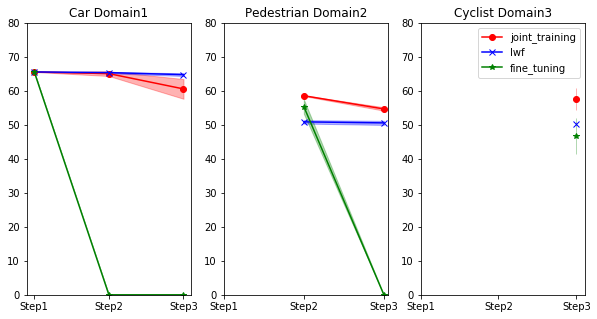

In [5]:
# plot figures (subplots 3x2)
plt.figure(figsize=(10, 5))
plt_list = [
    [(1,3,1), pltdata_car_d1, "Car Domain1"],
    [(1,3,2), pltdata_ped_d2, "Pedestrian Domain2"],
    [(1,3,3), pltdata_cyc_d3, "Cyclist Domain3"],
]
for plt_list_ in plt_list:
    position, pltdata, title = plt_list_
    plt.subplot(*position)
    plt.title(title)
    for k in pltdata.keys():
        plt.plot(pltdata[k]["x"], pltdata[k]["y"], g_plt_marker[k])
        plt.fill_between(pltdata[k]["x"],
                         [y-std for y, std in zip(pltdata[k]["y"], pltdata[k]["std"])],
                         [y+std for y, std in zip(pltdata[k]["y"], pltdata[k]["std"])],
                         color=g_plt_marker[k][0],alpha=0.3)
    plt.xticks(range(3), ["Step1", "Step2", "Step3"])
    plt.ylim([0, 80])

plt.legend([k for k in pltdata_car_d1.keys()])
# plt.show()
plt.savefig(f"{g_reuse_tag}.pdf", bbox_inches = 'tight',
    pad_inches = 0)